In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cv_data = pd.read_csv('total_cases.csv')

In [3]:
cv_data = cv_data[['World']]

In [4]:
cv_data.rename(columns={'World': 'y'}, inplace=True)

In [5]:
# cv_data.insert(0, '0', 1)
cv_data.insert(0, 'x', range(1, len(cv_data) + 1))
# cv_data.insert(2, '2', cv_data['1'] ** 2)

In [6]:
cv_data

,x,y
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44
...,...,...
145,146,5276942
146,147,5371158
147,148,5460254
148,149,5556130


In [7]:
np_array = cv_data.to_numpy()

In [8]:
def add_features(X, poly_degree):
    ret = np.ones((X.shape[0], 1))
    for pow in range(1, poly_degree + 1):
        ret = np.concatenate((ret, np.power(X, pow)), axis=1)
    return ret

In [9]:
train_X = add_features(np_array[:-7, 0][..., np.newaxis], poly_degree=2)
train_Y = np_array[:-7, -1][..., np.newaxis]
test_X = add_features(np_array[-7:, 0][..., np.newaxis], poly_degree=2)
test_Y = np_array[-7:, -1][..., np.newaxis]

In [10]:
np.concatenate((test_X, test_Y), axis=1)

array([[1.000000e+00, 1.440000e+02, 2.073600e+04, 5.069262e+06],
       [1.000000e+00, 1.450000e+02, 2.102500e+04, 5.175836e+06],
       [1.000000e+00, 1.460000e+02, 2.131600e+04, 5.276942e+06],
       [1.000000e+00, 1.470000e+02, 2.160900e+04, 5.371158e+06],
       [1.000000e+00, 1.480000e+02, 2.190400e+04, 5.460254e+06],
       [1.000000e+00, 1.490000e+02, 2.220100e+04, 5.556130e+06],
       [1.000000e+00, 1.500000e+02, 2.250000e+04, 5.656615e+06]])

In [11]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [12]:
theta = normal_equation(train_X, train_Y)

In [18]:
def predict(theta, x):
    X = add_features(x, poly_degree=2)
    return X.dot(theta)

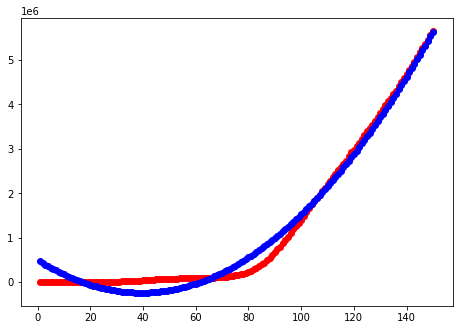

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(np_array[:, 0], np_array[:, -1], color='r')
ax.scatter(np_array[:, 0], predict(theta, np_array[:, 0][..., np.newaxis]), color='b')
plt.show()